In [43]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

In [44]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')

In [45]:
#For this model, we will examine the cornerback position
cb = df[df['Position'] == 'CB']

In [46]:
cbcols = list(cb.columns.values)

In [47]:
print(cbcols)

['Unnamed: 0', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Name', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Position', 'Power Moves', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']


In [48]:
#removing non-numeric columns and any unecessary extra columns
cb1 = cb[['Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic',
          'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping',
          'Man Coverage', 'Name', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Position', 'Power Moves',
          'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed', 'Spin Move', 'Stamina',
          'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short',
          'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt', 'Vertical', 'Bench',
          'Broad Jump', '3Cone', 'Shuttle', '40yd']]

In [51]:
#First, we will identify the significant correlations between overall rating and the rest of the data
#Once we know our significant variables, we will move on to vif testing to make sure there isn't any multicollinearity
cbcorr = cb1.corr()

In [52]:
cbpos = cbcorr[cbcorr['Overall Rating'] >= 0.5]

In [53]:
cbneg = cbcorr[cbcorr['Overall Rating'] <= -0.5]

In [54]:
print(cbpos['Overall Rating'])
#Here are the significant correlations for the corner back position

Awareness           0.927405
Man Coverage        0.731880
Overall Rating      1.000000
Play Recognition    0.916405
Stamina             0.521826
Zone Coverage       0.666194
Name: Overall Rating, dtype: float64


In [55]:
print(cbneg['Overall Rating'])
#There are not any significant negative variables.  
#Let's start with some VIF testing

Series([], Name: Overall Rating, dtype: float64)


In [56]:
cbsig = cb[['Awareness', 'Impact Blocking', 'Man Coverage', 'Play Recognition', 'Stamina', 'Zone Coverage']]

In [57]:
X = add_constant(cbsig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#It looks like the first variable we will remove is play recognition.

const               1297.495130
Awareness              9.011475
Impact Blocking        1.238061
Man Coverage           1.473443
Play Recognition       9.578053
Stamina                1.398928
Zone Coverage          1.522705
dtype: float64

In [58]:
cbsig1 = cb[['Awareness', 'Impact Blocking', 'Man Coverage', 'Stamina', 'Zone Coverage']]

In [59]:
X = add_constant(cbsig1)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Now that all of our variables have a vif below 5 we can move on to statistical testing

const              1233.878242
Awareness             2.095214
Impact Blocking       1.234906
Man Coverage          1.472623
Stamina               1.354810
Zone Coverage         1.456311
dtype: float64

In [60]:
CB = sm.OLS(cb['Overall Rating'], cbsig1).fit()
print(CB.summary())
#It looks like all of our variables are significant

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.853e+05
Date:                Fri, 20 Jul 2018   Prob (F-statistic):               0.00
Time:                        19:38:31   Log-Likelihood:                -745.95
No. Observations:                 409   AIC:                             1502.
Df Residuals:                     404   BIC:                             1522.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.3866      0.007     

In [61]:
def model():
    pv = (0.3866*cb['Awareness'])+(0.1059*cb['Impact Blocking'])+(0.3434*cb['Man Coverage'])+(0.2523*cb['Zone Coverage'])-0.0501*cb['Stamina']
    return pv

In [62]:
cb['Predicted Value'] = model()
cb['Residual'] = cb['Predicted Value'] -cb['Overall Rating']

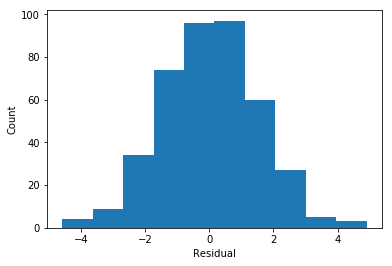

In [63]:
plt.hist(cb['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

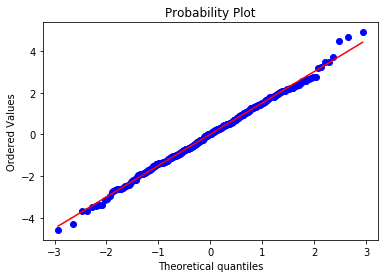

In [64]:
stats.probplot(cb['Residual'], plot=plt)
plt.show()
#There does not appear to be any outliers in the residuals

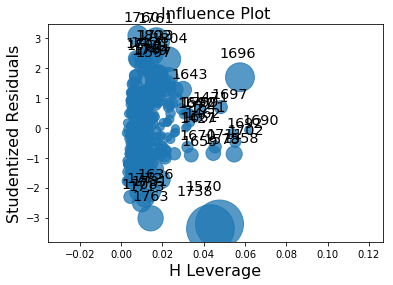

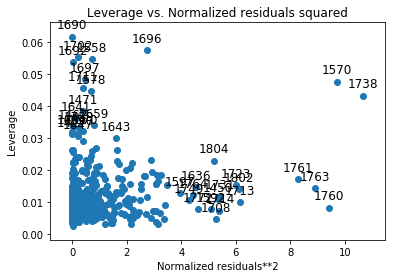

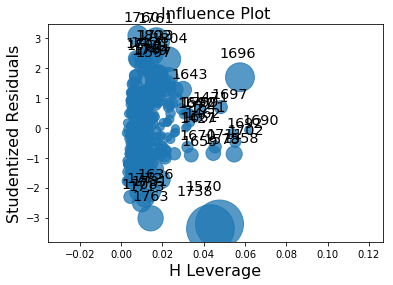

In [29]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(CB)
influence_plot(CB)
#There are two points that could have outsized influence.  We will remove them and see what that does to the model

In [65]:
cbul = cb.drop(df.index[[1570, 1738]])

In [66]:
print(cb.shape, cbul.shape)

(409, 54) (407, 54)


In [68]:
cbulsig = cbul[['Awareness', 'Impact Blocking', 'Man Coverage', 'Stamina', 'Zone Coverage']]

In [69]:
print(CB.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.853e+05
Date:                Fri, 20 Jul 2018   Prob (F-statistic):               0.00
Time:                        19:41:19   Log-Likelihood:                -745.95
No. Observations:                 409   AIC:                             1502.
Df Residuals:                     404   BIC:                             1522.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.3866      0.007     

In [73]:
CB2 = sm.OLS(cbul['Overall Rating'], cbulsig).fit()
print(CB2.summary())
#It looks like removing the leverage points reduced the AIC score by about 25 points

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.934e+05
Date:                Fri, 20 Jul 2018   Prob (F-statistic):               0.00
Time:                        19:45:03   Log-Likelihood:                -732.55
No. Observations:                 407   AIC:                             1475.
Df Residuals:                     402   BIC:                             1495.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.3870      0.007     

In [76]:
def model():
    pv = (0.3870*cbul['Awareness'])+(0.1122*cbul['Impact Blocking'])+(0.3388*cbul['Man Coverage'])+(0.2595*cbul['Zone Coverage'])-0.0556*cbul['Stamina']
    return pv

In [77]:
cbul['Predicted Value'] = model()
cbul['Residual'] = cbul['Predicted Value'] - cbul['Overall Rating']

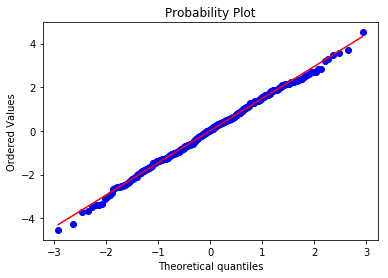

In [79]:
stats.probplot(cbul['Residual'], plot=plt)
plt.show()
#There does not appear to be any outliers in the residuals

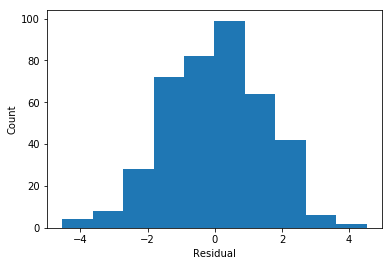

In [80]:
plt.hist(cbul['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

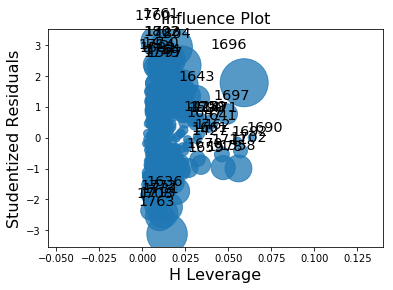

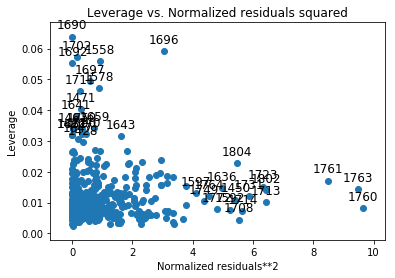

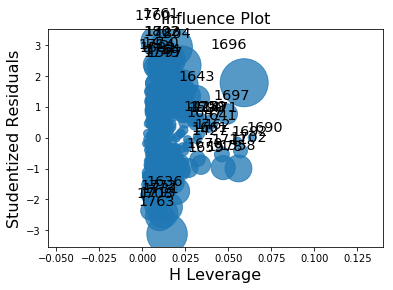

In [89]:
plot_leverage_resid2(CB2)
influence_plot(CB2)
#It doesn't look like there are any leverage points that we need to remove.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(cbulsig, cbul['Overall Rating'], test_size = 0.3, random_state =42)

In [82]:
reg=LinearRegression()

In [83]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
y_pred = reg.predict(X_test)

In [86]:
cbcv = cross_val_score(reg, cbulsig, cbul['Overall Rating'], cv=5)

In [87]:
cbcv_mean = np.mean(cbcv)

In [88]:
print(cbcv, cbcv_mean)
#it looks like the model did a good job of explaining the variation in the data

[0.97143722 0.97782524 0.97649869 0.95568236 0.91023842] 0.9583363875765432


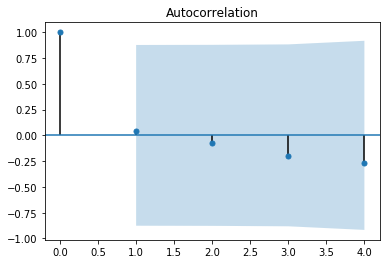

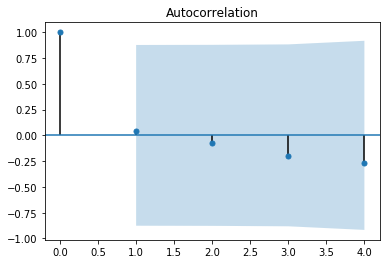

In [90]:
cbcorr1 = cbul[['Overall Rating', 'Awareness', 'Impact Blocking', 'Man Coverage', 'Stamina']].corr()
plot_acf(cbcorr1['Overall Rating'])
#there does not appear to be any autocorrelation looking at the plot below
#There is also a Durbin-Watson correlation of 1.746, which indicates no significant autocoreelation

In [91]:
#Finally, we check for homoskedasticity
het_breuschpagan(cbul['Residual'], cbulsig)
#Due to the low p-values, we can reject the null that there is homoskedasticity in the data

(147.74389958149536,
 6.196393382689519e-31,
 45.81805213909012,
 2.05005081281555e-37)

In [92]:
cbdesc = cb[['Overall Rating', 'Awareness', 'Impact Blocking', 'Man Coverage', 'Residual',
            'Predicted Value']]
cbdesc1 = cbdesc.describe()

In [93]:
cbdesc1.to_csv('C:\\Users\\tilleymusprime\\Desktop\\cbsig.csv')